***Brain Tumor Detection & Classification***


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from PIL import Image, ImageEnhance
import pandas as pd

from tensorflow import keras
from keras.layers import *
from keras.losses import *
from keras.models import *
from keras.metrics import *
from keras.optimizers import *
from keras.applications import *

In [ ]:
train_dir = '/content/drive/MyDrive/Final_Project/Training/'
test_dir = '/content/drive/MyDrive/Final_Project/Testing/'

train_path = []
train_labels = []

for label in os.listdir(train_dir):
  for image in os.listdir(train_dir+label):
    train_path.append(train_dir + label + '/' + image)
    train_labels.append(label)

train_path, train_labels = shuffle(train_path, train_labels)

In [ ]:
test_path = []
test_labels = []

for label in os.listdir(test_dir):
  for image in os.listdir(test_dir+label):
    test_path.append(test_dir + label + '/' + image)
    test_labels.append(label)

test_path, test_labels = shuffle(test_path, test_labels)

IMAGE_SIZE = 128

In [ ]:
## verifying the uniqueness of labels

utr_labels = list(set(train_labels))
#print(utr_labels)

uts_labels = list(set(test_labels))
#print(uts_labels)

labels = list(set(utr_labels + uts_labels))
#print(labels)

# total 4 labels - ['meningioma', 'notumor', 'pituitary', 'glioma']

In [ ]:
# no. of images in train and test datasets

len_train = len(train_labels) # 5722
len_test = len(test_labels) # 1311

print(len_train, len_test)

print('Training data -')
print(train_labels.count('glioma'))
print(train_labels.count('meningioma'))
print(train_labels.count('notumor'))
print(train_labels.count('pituitary'))

print('Testing data -')
print(test_labels.count('glioma'))
print(test_labels.count('meningioma'))
print(test_labels.count('notumor'))
print(test_labels.count('pituitary'))

5722 1311
Training data -
1321
1339
1605
1457
Testing data -
300
306
405
300


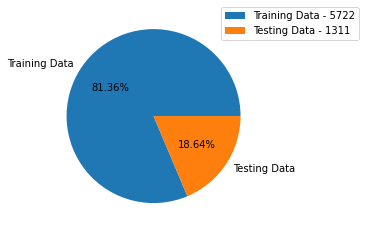

In [ ]:
plt.pie([len(train_labels),len(test_labels)], labels = ['Training Data','Testing Data'], autopct = '%1.2f%%')
plt.legend(['Training Data - ' + str(len_train), 'Testing Data - ' + str(len_test)],
           bbox_to_anchor=(1,0.75), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.show()

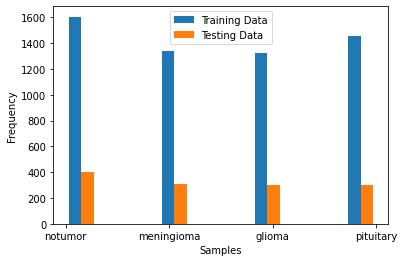

In [ ]:
n, bins, patches = plt.hist([train_labels, test_labels], label = ['Training Data','Testing Data'])
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Frequency')
plt.show()

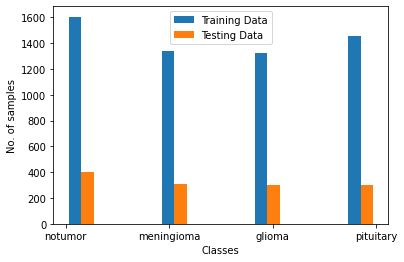

In [ ]:
plt.hist([train_labels, test_labels], label = ['Training Data','Testing Data'])
plt.legend()
plt.xlabel('Classes')
plt.ylabel('No. of samples')
plt.show()

(417, 428, 3)
(512, 512, 3)
(315, 315, 3)


Text(0.5, 1.0, 'notumor')

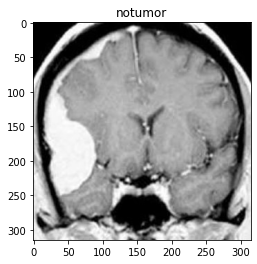

In [ ]:
## Size of images is varying
## Need to resize and bring them to one size and bw images
## Few examples when executed for 501, 502, 503 for this shuffled data
# 512 x 512 x 3 - 3D - color
# 512 x 512     - 1d - bw
# 444 x 468 x 3 - 3D - color

## Below values may vary from above as the dataset is getting shuffled
print(io.imread(train_path[501]).shape)
print(io.imread(train_path[502]).shape)
print(io.imread(train_path[503]).shape)

## printing image - 503

img = io.imread(train_path[503])
plt.figure()
plt.imshow(img, cmap = 'gray')
plt.title(train_labels[0])

In [ ]:
def raw_to_img(paths):
  img = []
  for path in paths:
    temp =  tf.keras.utils.load_img(path)
    img.append(temp)
  return img

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=428x417 at 0x7F9B04105040>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F9B03BDB4F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=315x315 at 0x7F9B03BDB4C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x7F9B03BD42B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=201x251 at 0x7F9B03BD4970>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x7F9B03BD4280>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03BD4D90>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03BD4E80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x7F9B03BD4EE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F9B03CB0A00>


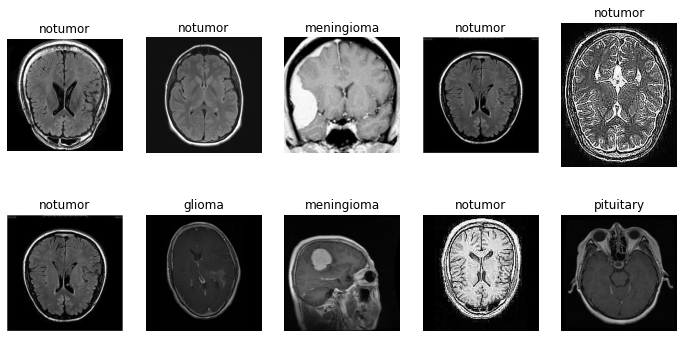

In [ ]:
display = raw_to_img(train_path[500:511])
lab = train_labels[500:511]

fig = plt.figure(figsize=(12,6))

for x in range(1,11):
  fig.add_subplot(2,5,x)
  plt.axis('off')
  plt.title(lab[x])
  plt.imshow(display[x])
  ## added to see size
  print(display[x])

plt.show()

<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03CF7C40>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03CF77C0>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03CF76D0>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03CF7850>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x7F9B03F1C190>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03E14B50>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03E9F8E0>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03BDBCA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=286x356 at 0x7F9B03E32430>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F9B03CF7340>


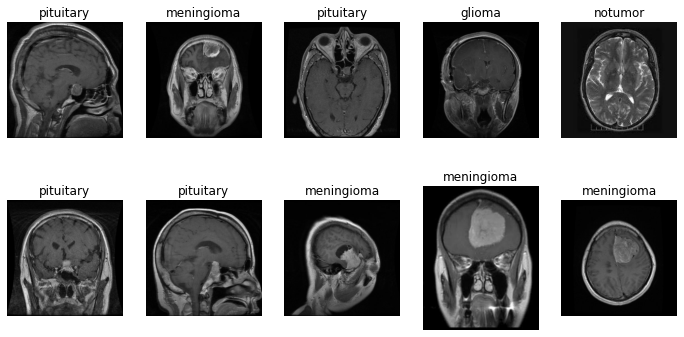

In [ ]:
display = raw_to_img(test_path[500:511])
lab = test_labels[500:511]

fig = plt.figure(figsize=(12,6))

for x in range(1,11):
  fig.add_subplot(2,5,x)
  plt.axis('off')
  plt.title(lab[x])
  plt.imshow(display[x])
  ## added to see size
  print(display[x])

plt.show()

We may need to work on the input images...

In [ ]:
def preprocess_img(img):
  # Input: Image in PIL format
  # Output: Image in PIL format
  # Work to do: Increase brightness and quality of image
  enhancer = ImageEnhance.Brightness(img)
  bright_image = enhancer.enhance(1.5)
  contraster = ImageEnhance.Contrast(bright_image)
  processed_img = contraster.enhance(1.5)

  return processed_img

In [ ]:
def convert_img(paths):
  # Input: Path list for images
  # Output: Final pre-processed image (np array)
  # Work to do: Convert path to PIL. Then process that image and output array of np.array

  images = []
  for i, path in enumerate(paths):
    # Loading images with targeted size as (128,128)
    img =  tf.keras.utils.load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
    # Make image quality better ; Returns image in PIL format
    img = preprocess_img(img)
    # Do something to convert PIL to array
    img = np.array(img)/255.
    images.append(img)
  return np.array(images)

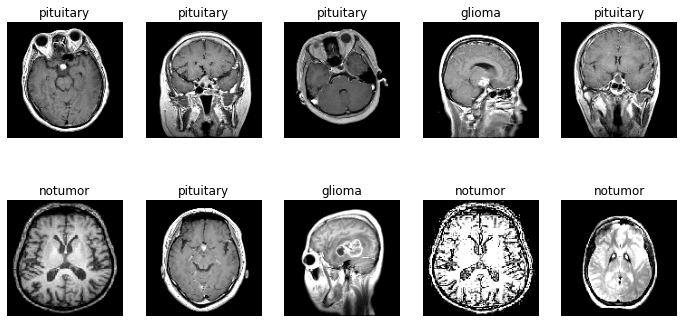

In [ ]:
img_list = convert_img(train_path[500:511])
lab = train_labels[500:511]
fig = plt.figure(figsize=(12,6))

for x in range(1,11):
  fig.add_subplot(2,5,x)
  plt.axis('off')
  plt.title(lab[x])
  plt.imshow(img_list[x])
  #print(img_list[x].shape)

plt.show()

**Managing the Data flow now...**

In [ ]:
lab = (os.listdir(train_dir))
lab.index('glioma')

3

In [ ]:
def one_hot_encoding(labels):
  onehotlabel = []
  label_name_to_index = os.listdir(train_dir)
  for label in labels:
    onehotlabel.append(label_name_to_index.index(label))

  return np.array(onehotlabel)


In [ ]:
# Function for generating preprocessed data from paths
def datagen(train_paths, train_labels, batch_size, epochs):
  # batch_size = 32
  n = len(train_paths)

  for epoch in range(epochs):
    for paths in range(0, n, batch_size):
      batch_paths = train_paths[paths:paths + batch_size]
      batch_inputimg = convert_img(batch_paths)
      batch_label = train_labels[paths:paths + batch_size]
      batch_label = one_hot_encoding(batch_label)
      yield batch_inputimg, batch_label

We will start with the model building now...

Stop running here...

**Model 1 - VGG16**

In [ ]:
base = VGG16(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

for layers in base.layers:
  layers.trainable = False

base.layers[-2].trainable = True
base.layers[-3].trainable = True
base.layers[-4].trainable = True

vgg = Sequential()
vgg.add(Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
vgg.add(base)
vgg.add(Flatten())
vgg.add(Dense(128, activation = 'relu'))
vgg.add(Dense(128, activation = 'relu'))
vgg.add(Dense(len(os.listdir(train_dir)), activation = 'softmax'))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15,780,420
Trainable params: 8,145,156
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
lr = 0.001
vgg.compile(optimizer = Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

In [ ]:
batch_size = 32
epochs = 10
steps = int(len(train_path)/batch_size)
history = vgg.fit(datagen(train_path, train_labels, batch_size, epochs), validation_data = (test_X,test_Y), epochs = epochs, steps_per_epoch = steps)

Epoch 1/10
178/178 [==============================] - 3666s 21s/step - loss: 0.6944 - sparse_categorical_accuracy: 0.7084 - val_loss: 0.5565 - val_sparse_categorical_accuracy: 0.7872
Epoch 2/10
178/178 [==============================] - 43s 165ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.8880 - val_loss: 0.3611 - val_sparse_categorical_accuracy: 0.8627
Epoch 3/10
178/178 [==============================] - 29s 165ms/step - loss: 0.2214 - sparse_categorical_accuracy: 0.9218 - val_loss: 0.3871 - val_sparse_categorical_accuracy: 0.8658
Epoch 4/10
178/178 [==============================] - 29s 165ms/step - loss: 0.1719 - sparse_categorical_accuracy: 0.9401 - val_loss: 0.2187 - val_sparse_categorical_accuracy: 0.9199
Epoch 5/10
178/178 [==============================] - 29s 164ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9533 - val_loss: 0.3204 - val_sparse_categorical_accuracy: 0.9092
Epoch 6/10
178/178 [==============================] - 28s 160ms/step - loss: 0.1215 -

In [ ]:
import pickle
pickle.dump(vgg, open('vgg16.pkl', 'wb'))

In [ ]:
# train_data = convert_img(train_path)
# train_Y = one_hot_encoding(train_labels)
# batch_size = 10
# epochs = 5
# steps = int(len(train_path)/batch_size)

# history = vgg.fit(train_data, train_Y, epochs = epochs, steps_per_epoch = steps, validation_split = 0.20)

**Model 2 - VGG19**

In [ ]:
base19 = VGG19(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

for layers in base19.layers:
  layers.trainable = False

vgg19 = Sequential()
vgg19.add(Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
vgg19.add(base19)
vgg19.add(Flatten())
vgg19.add(Dense(128, activation = 'relu'))
vgg19.add(Dropout(0.3))
vgg19.add(Dense(128, activation = 'relu'))
vgg19.add(Dropout(0.2))
vgg19.add(Dense(len(os.listdir(train_dir)), activation = 'softmax'))

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
vgg19.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1048704   
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21,090,116
Trainable params: 1,065,732
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
lr = 0.001
vgg19.compile(optimizer = Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

In [ ]:
test_X = convert_img(test_path)
test_Y = one_hot_encoding(test_labels)

In [ ]:
batch_size = 32
epochs = 10
steps = int(len(train_path)/batch_size)
history1 = vgg19.fit(datagen(train_path, train_labels, batch_size, epochs), validation_data = (test_X,test_Y), epochs = epochs, steps_per_epoch = steps)

Epoch 1/10
178/178 [==============================] - 30s 167ms/step - loss: 0.4611 - sparse_categorical_accuracy: 0.8202 - val_loss: 0.4286 - val_sparse_categorical_accuracy: 0.8276
Epoch 2/10
178/178 [==============================] - 29s 161ms/step - loss: 0.2523 - sparse_categorical_accuracy: 0.9063 - val_loss: 0.3670 - val_sparse_categorical_accuracy: 0.8665
Epoch 3/10
178/178 [==============================] - 28s 160ms/step - loss: 0.1870 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.2043 - val_sparse_categorical_accuracy: 0.9237
Epoch 4/10
178/178 [==============================] - 28s 159ms/step - loss: 0.1336 - sparse_categorical_accuracy: 0.9471 - val_loss: 0.2904 - val_sparse_categorical_accuracy: 0.8924
Epoch 5/10
178/178 [==============================] - 29s 164ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9576 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.8818
Epoch 6/10
178/178 [==============================] - 29s 163ms/step - loss: 0.1137 -

**Model 3 - Resnet -50**

In [ ]:
base50 = ResNet50(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

for layers in base50.layers:
  layers.trainable = False

rn50 = Sequential()
rn50.add(Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
rn50.add(base50)
rn50.add(Flatten())
rn50.add(Dense(512, activation='relu'))
rn50.add(Dense(5, activation='softmax'))

In [ ]:
rn50.summary()

In [ ]:
lr = 0.001
rn50.compile(optimizer = Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

In [ ]:
# test_X = convert_img(test_path)
# test_Y = one_hot_encoding(test_labels)

In [ ]:
batch_size = 32
epochs = 10
steps = int(len(train_path)/batch_size)
history500 = rn50.fit(datagen(train_path, train_labels, batch_size, epochs), validation_data = (test_X,test_Y), epochs = epochs, steps_per_epoch = steps)

Epoch 1/10
178/178 [==============================] - 37s 210ms/step - loss: 0.2493 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.3385 - val_sparse_categorical_accuracy: 0.8589
Epoch 2/10
178/178 [==============================] - 36s 203ms/step - loss: 0.2407 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.2964 - val_sparse_categorical_accuracy: 0.8780
Epoch 3/10
178/178 [==============================] - 40s 226ms/step - loss: 0.2188 - sparse_categorical_accuracy: 0.9148 - val_loss: 0.2741 - val_sparse_categorical_accuracy: 0.8863
Epoch 4/10
178/178 [==============================] - 45s 254ms/step - loss: 0.2155 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.2470 - val_sparse_categorical_accuracy: 0.9031
Epoch 5/10
178/178 [==============================] - 33s 188ms/step - loss: 0.2148 - sparse_categorical_accuracy: 0.9132 - val_loss: 0.3051 - val_sparse_categorical_accuracy: 0.8924
Epoch 6/10
178/178 [==============================] - 33s 187ms/step - loss: 0.2238 -

Start running again...

In [ ]:
test_X = convert_img(test_path)
test_Y = one_hot_encoding(test_labels)

**Model 1 with regularizer**

In [ ]:
base = VGG16(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

for layers in base.layers:
  layers.trainable = False

base.layers[-2].trainable = True
base.layers[-3].trainable = True
base.layers[-4].trainable = True

vgg = Sequential()
vgg.add(Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
vgg.add(base)
vgg.add(Flatten())
vgg.add(Dense(128, activation = 'relu'))
vgg.add(Dropout(0.3))
vgg.add(Dense(128, activation = 'relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(len(os.listdir(train_dir)), activation = 'softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 5

In [ ]:
lr = 0.001
vgg.compile(optimizer = Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

In [ ]:
batch_size = 32
epochs = 10
steps = int(len(train_path)/batch_size)
history = vgg.fit(datagen(train_path, train_labels, batch_size, epochs), validation_data = (test_X,test_Y), epochs = epochs, steps_per_epoch = steps)

Epoch 1/10
178/178 [==============================] - 3923s 22s/step - loss: 0.8229 - sparse_categorical_accuracy: 0.6329 - val_loss: 0.4703 - val_sparse_categorical_accuracy: 0.7941
Epoch 2/10
178/178 [==============================] - 47s 180ms/step - loss: 0.4065 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.3959 - val_sparse_categorical_accuracy: 0.8345
Epoch 3/10
178/178 [==============================] - 31s 178ms/step - loss: 0.2793 - sparse_categorical_accuracy: 0.9002 - val_loss: 0.3350 - val_sparse_categorical_accuracy: 0.8604
Epoch 4/10
178/178 [==============================] - 31s 175ms/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9337 - val_loss: 0.3515 - val_sparse_categorical_accuracy: 0.8650
Epoch 5/10
178/178 [==============================] - 30s 169ms/step - loss: 0.1445 - sparse_categorical_accuracy: 0.9476 - val_loss: 0.2658 - val_sparse_categorical_accuracy: 0.9001
Epoch 6/10
178/178 [==============================] - 31s 175ms/step - loss: 0.1232 -

In [ ]:
import pickle
pickle.dump(vgg, open('vgg16.pkl', 'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = test_Y
y_pred = vgg.predict(test_X)

conf_matrix = confusion_matrix(y_true,y_pred)
print(conf_matrix)

41/41 [==============================] - 271s 7s/step


ValueError: ignored

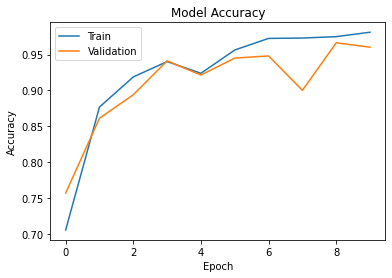

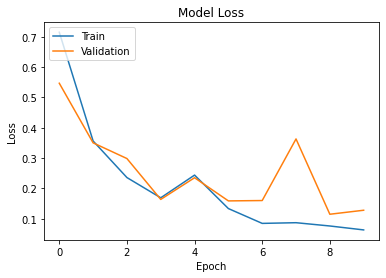

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

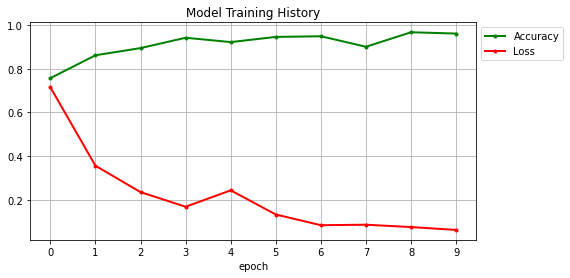

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['val_sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Model 2 with regularizer**

In [ ]:
base19 = VGG19(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

for layers in base19.layers:
  layers.trainable = False

base.layers[-2].trainable = True
base.layers[-3].trainable = True
base.layers[-4].trainable = True

vgg19 = Sequential()
vgg19.add(Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
vgg19.add(base19)
vgg19.add(Flatten())
vgg19.add(Dense(128, activation = 'relu'))
vgg19.add(Dropout(0.3))
vgg19.add(Dense(128, activation = 'relu'))
vgg19.add(Dropout(0.2))
vgg19.add(Dense(len(os.listdir(train_dir)), activation = 'softmax'))

In [ ]:
vgg19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 4)                

In [ ]:
lr = 0.001
vgg19.compile(optimizer = Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

In [ ]:
batch_size = 32
epochs = 10
steps = int(len(train_path)/batch_size)
history1 = vgg19.fit(datagen(train_path, train_labels, batch_size, epochs), validation_data = (test_X,test_Y), epochs = epochs, steps_per_epoch = steps)

Epoch 1/10
178/178 [==============================] - 36s 197ms/step - loss: 0.6189 - sparse_categorical_accuracy: 0.7553 - val_loss: 0.4829 - val_sparse_categorical_accuracy: 0.7956
Epoch 2/10
178/178 [==============================] - 33s 187ms/step - loss: 0.3865 - sparse_categorical_accuracy: 0.8533 - val_loss: 0.3828 - val_sparse_categorical_accuracy: 0.8352
Epoch 3/10
178/178 [==============================] - 33s 187ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.8715 - val_loss: 0.3145 - val_sparse_categorical_accuracy: 0.8764
Epoch 4/10
178/178 [==============================] - 32s 178ms/step - loss: 0.3180 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.3673 - val_sparse_categorical_accuracy: 0.8581
Epoch 5/10
178/178 [==============================] - 33s 187ms/step - loss: 0.2829 - sparse_categorical_accuracy: 0.8942 - val_loss: 0.2671 - val_sparse_categorical_accuracy: 0.9054
Epoch 6/10
178/178 [==============================] - 32s 180ms/step - loss: 0.2778 -

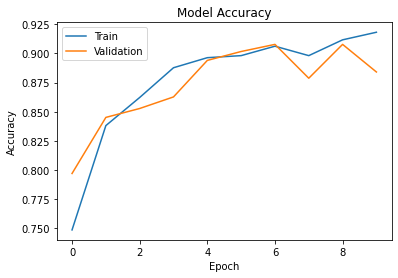

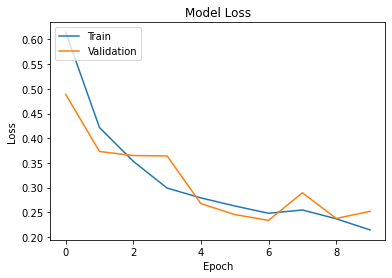

In [ ]:
plt.plot(history1.history['sparse_categorical_accuracy'])
plt.plot(history1.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

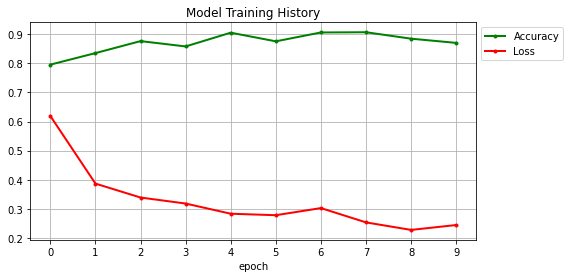

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history1.history['val_sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history1.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Model 3 with regularization**

In [ ]:
base50 = ResNet50(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

for layers in base50.layers:
  layers.trainable = False

base.layers[-2].trainable = True
base.layers[-3].trainable = True
base.layers[-4].trainable = True

rn50 = Sequential()
rn50.add(Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
rn50.add(base50)
rn50.add(Flatten())
rn50.add(Dense(512, activation='relu'))
rn50.add(Dropout(0.3))
rn50.add(Dense(5, activation='softmax'))

In [ ]:
rn50.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_11 (Dense)            (None, 512)               16777728  
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 40,368,005
Trainable params: 16,780,293
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
lr = 0.001
rn50.compile(optimizer = Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

In [ ]:
batch_size = 32
epochs = 10
steps = int(len(train_path)/batch_size)
history5 = rn50.fit(datagen(train_path, train_labels, batch_size, epochs), validation_data = (test_X,test_Y), epochs = epochs, steps_per_epoch = steps)

Epoch 1/10
178/178 [==============================] - 39s 202ms/step - loss: 0.7492 - sparse_categorical_accuracy: 0.7135 - val_loss: 0.6700 - val_sparse_categorical_accuracy: 0.7529
Epoch 2/10
178/178 [==============================] - 32s 179ms/step - loss: 0.4839 - sparse_categorical_accuracy: 0.8148 - val_loss: 0.6065 - val_sparse_categorical_accuracy: 0.7773
Epoch 3/10
178/178 [==============================] - 33s 187ms/step - loss: 0.4127 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.4707 - val_sparse_categorical_accuracy: 0.8078
Epoch 4/10
178/178 [==============================] - 32s 181ms/step - loss: 0.3714 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.4544 - val_sparse_categorical_accuracy: 0.8085
Epoch 5/10
178/178 [==============================] - 33s 185ms/step - loss: 0.3535 - sparse_categorical_accuracy: 0.8606 - val_loss: 0.4083 - val_sparse_categorical_accuracy: 0.8284
Epoch 6/10
178/178 [==============================] - 33s 185ms/step - loss: 0.3255 -

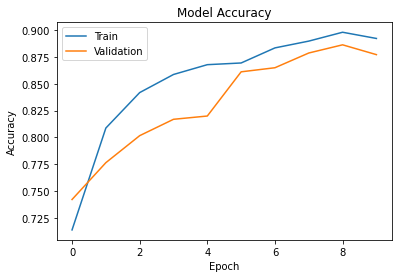

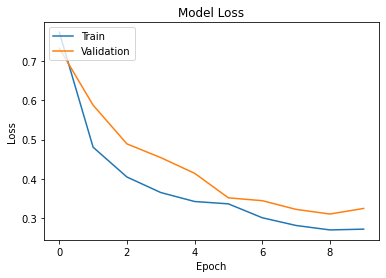

In [ ]:
plt.plot(history5.history['sparse_categorical_accuracy'])
plt.plot(history5.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

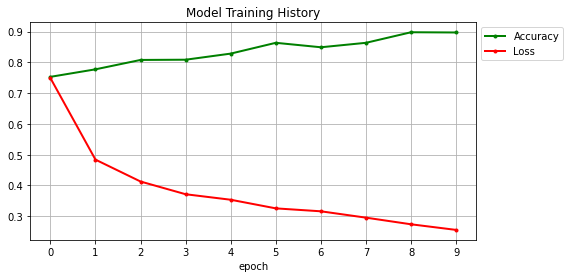

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history5.history['val_sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history5.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
model1 = {'Model Name':['LeNet','VGG16','VGG19','ResNet'], 'Accuracies':[0,97.50,96.50,92.16], 'Validation Accuracy':[0,93.52,86.80,90.60]}

model_wo_reg = pd.DataFrame(model1)
print(model_wo_reg)

  Model Name  Accuracies  Validation Accuracy
0      LeNet        0.00                 0.00
1      VGG16       97.50                93.52
2      VGG19       96.50                86.80
3     ResNet       92.16                90.60


In [ ]:
model2 = {'Model Name':['LeNet','VGG16','VGG19','ResNet'], 'Accuracies':[0,98.12,91.81,89.23], 'Validation Accuracy':[0,96.03,86.80,87.72]}

model_wt_reg = pd.DataFrame(model2)
print(model_wt_reg)

  Model Name  Accuracies  Validation Accuracy
0      LeNet        0.00                 0.00
1      VGG16       98.12                96.03
2      VGG19       91.81                86.80
3     ResNet       89.23                87.72


In [ ]:
from PIL import Image, ImageEnhance
import numpy as np

class Preprocess:

    def enhance_img(self, img):
        # Input: Image in PIL format
        # Output: Image in PIL format
        # Work done: Increased brightness and quality of image
        enhancer = ImageEnhance.Brightness(img)
        bright_image = enhancer.enhance(1.5)
        contraster = ImageEnhance.Contrast(bright_image)
        processed_img = contraster.enhance(1.5)

        return processed_img


    def preprocess_img(self, image):
        # Input: Image in PIL
        # Output: Final pre-processed image (np array)

        # Make image quality better ; Returns image in PIL format
        img = self.enhance_img(image)

        # Convert image to np.array and return
        img = np.array(img)/255.
        return img



In [ ]:
obj = Preprocess()

import pickle
pickle.dump(obj, open('transformer.pkl', 'wb'))
